# Data Importing

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px 
import numpy as np
import requests
import json
import csv
#import folium
import hvplot.pandas
#from config import geoapify_key
import seaborn as sns



In [4]:
df = pd.read_csv("Data_Analyst_Data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Data Cleaning 

In [5]:
# Check to see how many rows and columns we have
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 9355
Number of Columns: 12


In [6]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [7]:
# Check to see whether there are duplicates
duplicate_rows = df[df.duplicated()]
# Print the number of duplicates
num_duplicates = duplicate_rows.shape[0]
print("Number of duplicate rows:", num_duplicates)

null_values = df.isnull().sum()
# Check Data to make sure that the data set does not have any Null values
print("Null values count for each column:")
print(null_values)

Number of duplicate rows: 4014
Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


# Unique Job Titles

In [8]:
# Find the unique count of the specific job titles 
specific_jobs = df["job_title"].value_counts()
specific_jobs

job_title
Data Engineer                               2195
Data Scientist                              1989
Data Analyst                                1388
Machine Learning Engineer                    991
Applied Scientist                            272
Research Scientist                           269
Analytics Engineer                           256
Data Architect                               213
Business Intelligence Engineer               144
Research Engineer                            144
Data Manager                                 132
ML Engineer                                  106
Data Science Manager                          88
Machine Learning Scientist                    76
Business Intelligence Analyst                 54
BI Developer                                  52
Data Science Consultant                       44
Data Specialist                               40
Research Analyst                              39
Decision Scientist                            38
Data Analy

In [9]:
#Get the top 10 job titles
data_df= df['job_title'].value_counts().reset_index()
data_df.columns = ['job_title', 'count']
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


In [10]:
#Find the top 10 job titles in the United States  
data_df = df.groupby(['company_location', 'job_title']).size().reset_index(name='count')
data_df = data_df.sort_values(by='count', ascending=False)
data_df = data_df.head(10)
data_df

,company_location,job_title,count
373,United States,Data Engineer,1937
396,United States,Data Scientist,1720
365,United States,Data Analyst,1219
419,United States,Machine Learning Engineer,869
346,United States,Applied Scientist,271
437,United States,Research Scientist,244
342,United States,Analytics Engineer,224
371,United States,Data Architect,199
356,United States,Business Intelligence Engineer,140
436,United States,Research Engineer,131


### Plotting the graphs

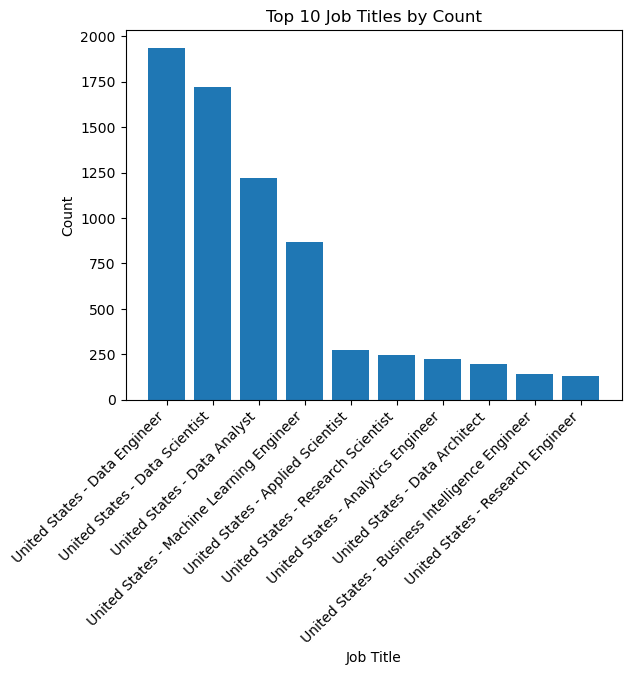

<Figure size 2000x1500 with 0 Axes>

In [11]:
#Plot a bar graph
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.bar(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'], top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()


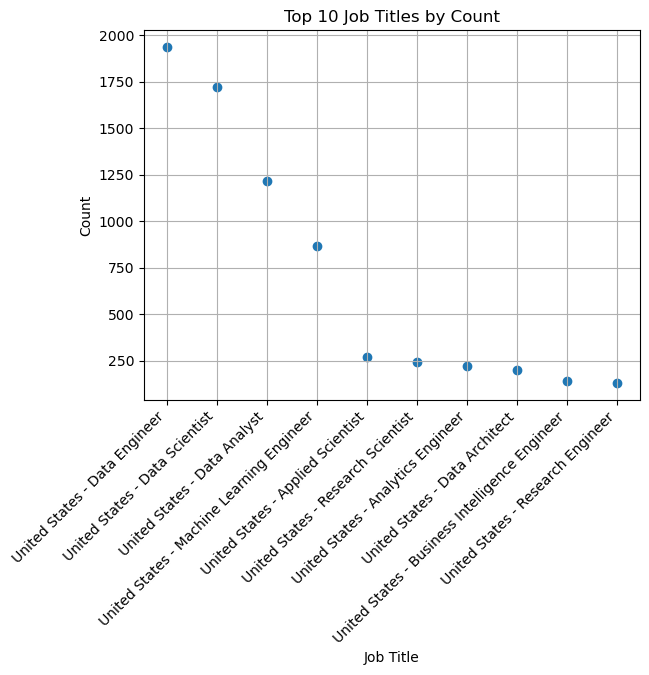

<Figure size 2000x1500 with 0 Axes>

In [12]:
#plot a line graph 
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.scatter(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'], top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Top 10 Salary per Year

In [13]:
mean_salary_by_year = df.groupby(["work_year", "job_title"]).agg({'salary_in_usd': 'mean'}).reset_index().sort_values(by=["work_year", "salary_in_usd"], ascending=False)

### mean_salary_by_year

In [14]:
mean_salary_2023 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2023].head(10)
mean_salary_2022 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2022].head(10)
mean_salary_2021 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2021].head(10)
mean_salary_2020 = mean_salary_by_year[mean_salary_by_year["work_year"] == 2020].head(10)

In [15]:
mean_salary_2023

,work_year,job_title,salary_in_usd
142,2023,Analytics Engineering Manager,399880.000000
216,2023,Head of Machine Learning,259000.000000
140,2023,AWS Data Architect,258000.000000
134,2023,AI Architect,250328.000000
209,2023,Director of Data Science,238153.523810
214,2023,Head of Data,223261.423077
207,2023,Deep Learning Engineer,215424.400000
215,2023,Head of Data Science,213281.000000
197,2023,Data Science Manager,209644.698113
221,2023,ML Engineer,205157.659091


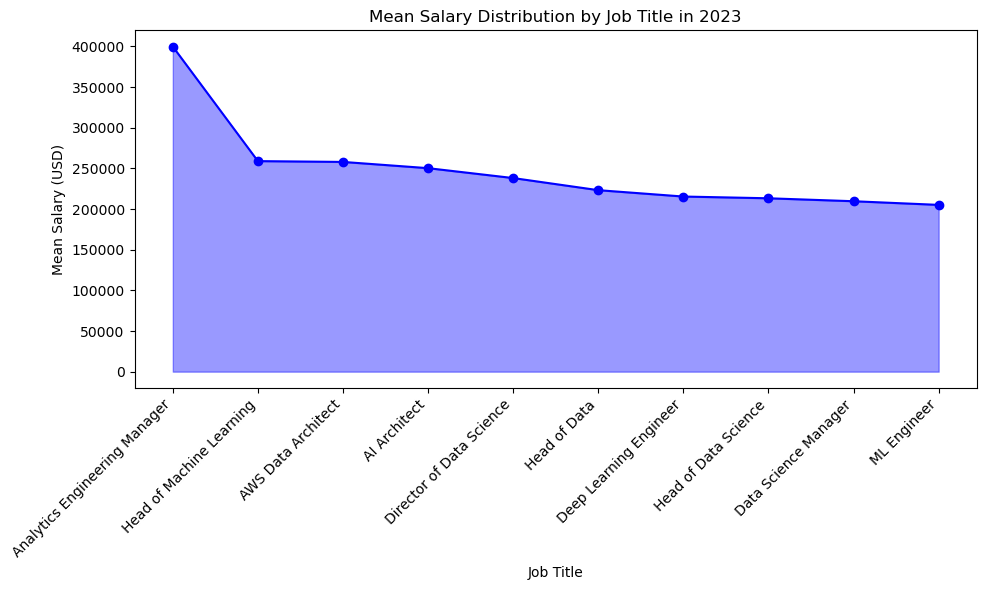

In [16]:
plt.figure(figsize=(10, 6))
plt.fill_between(mean_salary_2023['job_title'], mean_salary_2023['salary_in_usd'], color='blue', alpha=0.4)
plt.plot(mean_salary_2023['job_title'], mean_salary_2023['salary_in_usd'], color='blue', marker='o')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
mean_salary_2022

,work_year,job_title,salary_in_usd
90,2022,Data Analytics Lead,405000.000000
102,2022,Data Science Tech Lead,375000.000000
70,2022,AI Developer,275000.000000
124,2022,Machine Learning Software Engineer,240440.000000
126,2022,Marketing Data Analyst,200000.000000
111,2022,Head of Data Science,195937.500000
101,2022,Data Science Manager,191360.300000
130,2022,Principal Machine Learning Engineer,190000.000000
77,2022,Applied Scientist,188311.111111
84,2022,Cloud Database Engineer,175000.000000


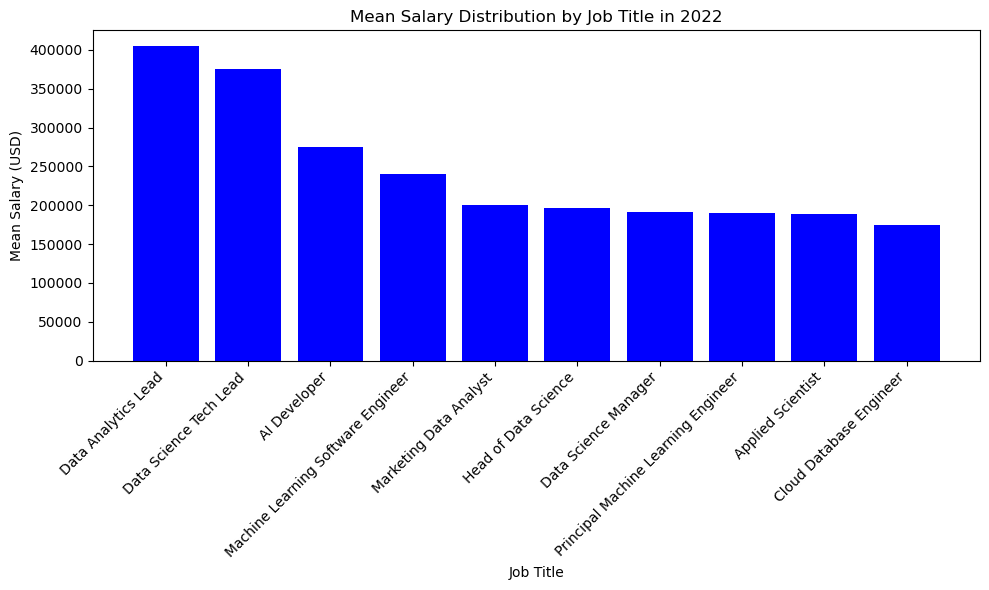

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2022['job_title'], mean_salary_2022['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
mean_salary_2021

,work_year,job_title,salary_in_usd
56,2021,ML Engineer,263000.000000
35,2021,Cloud Data Architect,250000.000000
66,2021,Principal Data Scientist,239152.400000
29,2021,Applied Machine Learning Scientist,230700.000000
59,2021,Machine Learning Infrastructure Engineer,195000.000000
65,2021,Principal Data Engineer,192500.000000
61,2021,Machine Learning Scientist,190000.000000
52,2021,Head of Data,189279.666667
69,2021,Staff Machine Learning Engineer,185000.000000
55,2021,Lead Data Engineer,179720.000000


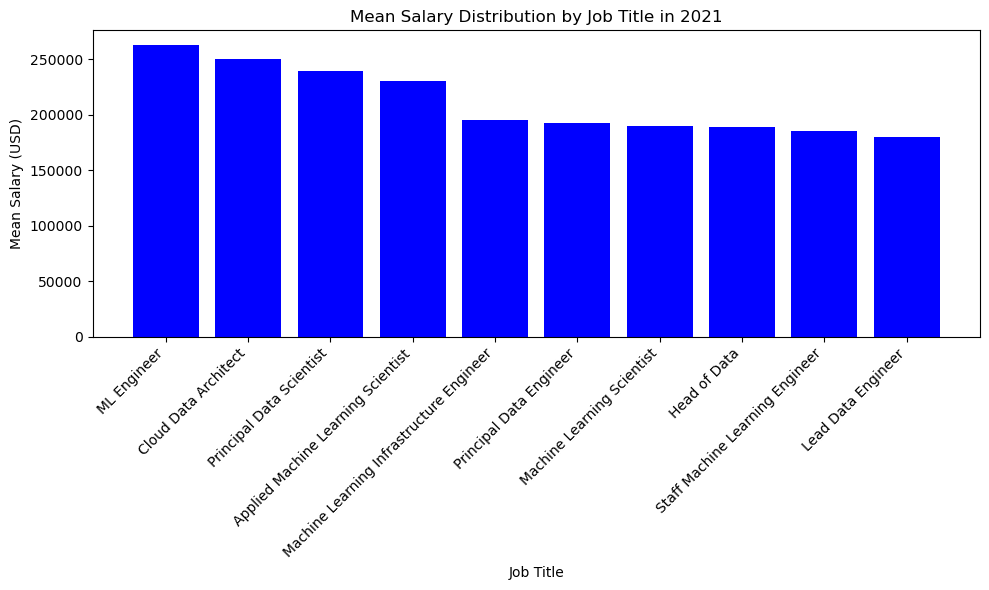

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(mean_salary_2021['job_title'], mean_salary_2021['salary_in_usd'], color='blue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Job Title in 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
mean_salary_2020

,work_year,job_title,salary_in_usd
11,2020,Director of Data Science,325000.0
20,2020,Managing Director Data Science,300000.0
19,2020,Machine Learning Scientist,260000.0
23,2020,Research Scientist,246000.0
9,2020,Data Science Manager,190200.0
26,2020,Staff Data Scientist,164000.0
14,2020,Lead Data Scientist,152500.0
21,2020,Principal Data Scientist,148261.0
16,2020,Machine Learning Engineer,145904.5
18,2020,Machine Learning Manager,117104.0


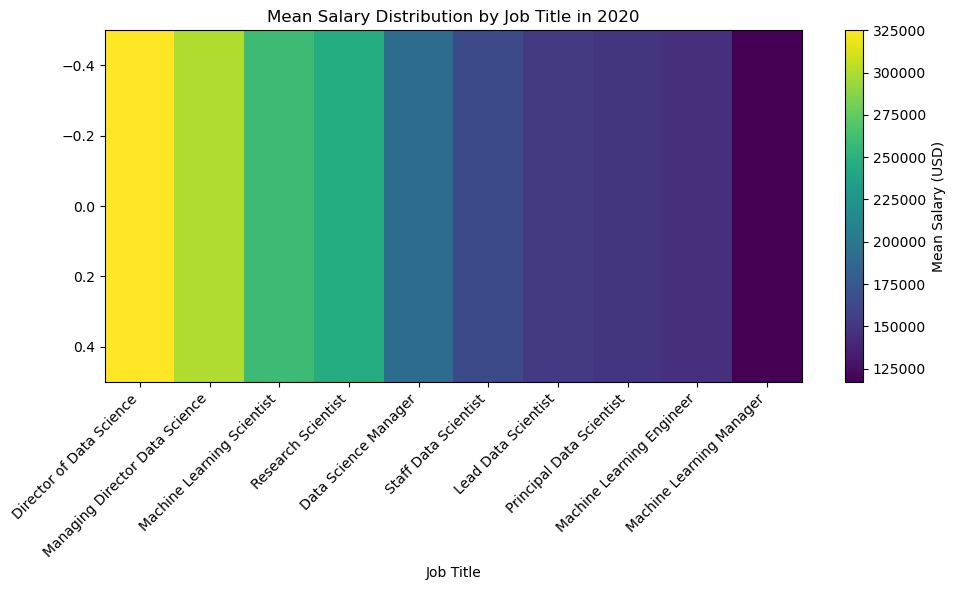

In [22]:
plt.figure(figsize=(10, 6))
# Convert job titles and salaries into a grid
job_titles = mean_salary_2020['job_title']
salary_values = mean_salary_2020['salary_in_usd']
heatmap_data = [salary_values]
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Mean Salary (USD)')
plt.xticks(range(len(job_titles)), job_titles, rotation=45, ha='right')
plt.xlabel('Job Title')
plt.title('Mean Salary Distribution by Job Title in 2020')
plt.tight_layout()
plt.show()

In [23]:
mean_salary_by_year.sort_values(by=["work_year", "salary_in_usd"], ascending=False)

,work_year,job_title,salary_in_usd
142,2023,Analytics Engineering Manager,399880.000000
216,2023,Head of Machine Learning,259000.000000
140,2023,AWS Data Architect,258000.000000
134,2023,AI Architect,250328.000000
209,2023,Director of Data Science,238153.523810
214,2023,Head of Data,223261.423077
207,2023,Deep Learning Engineer,215424.400000
215,2023,Head of Data Science,213281.000000
197,2023,Data Science Manager,209644.698113
221,2023,ML Engineer,205157.659091


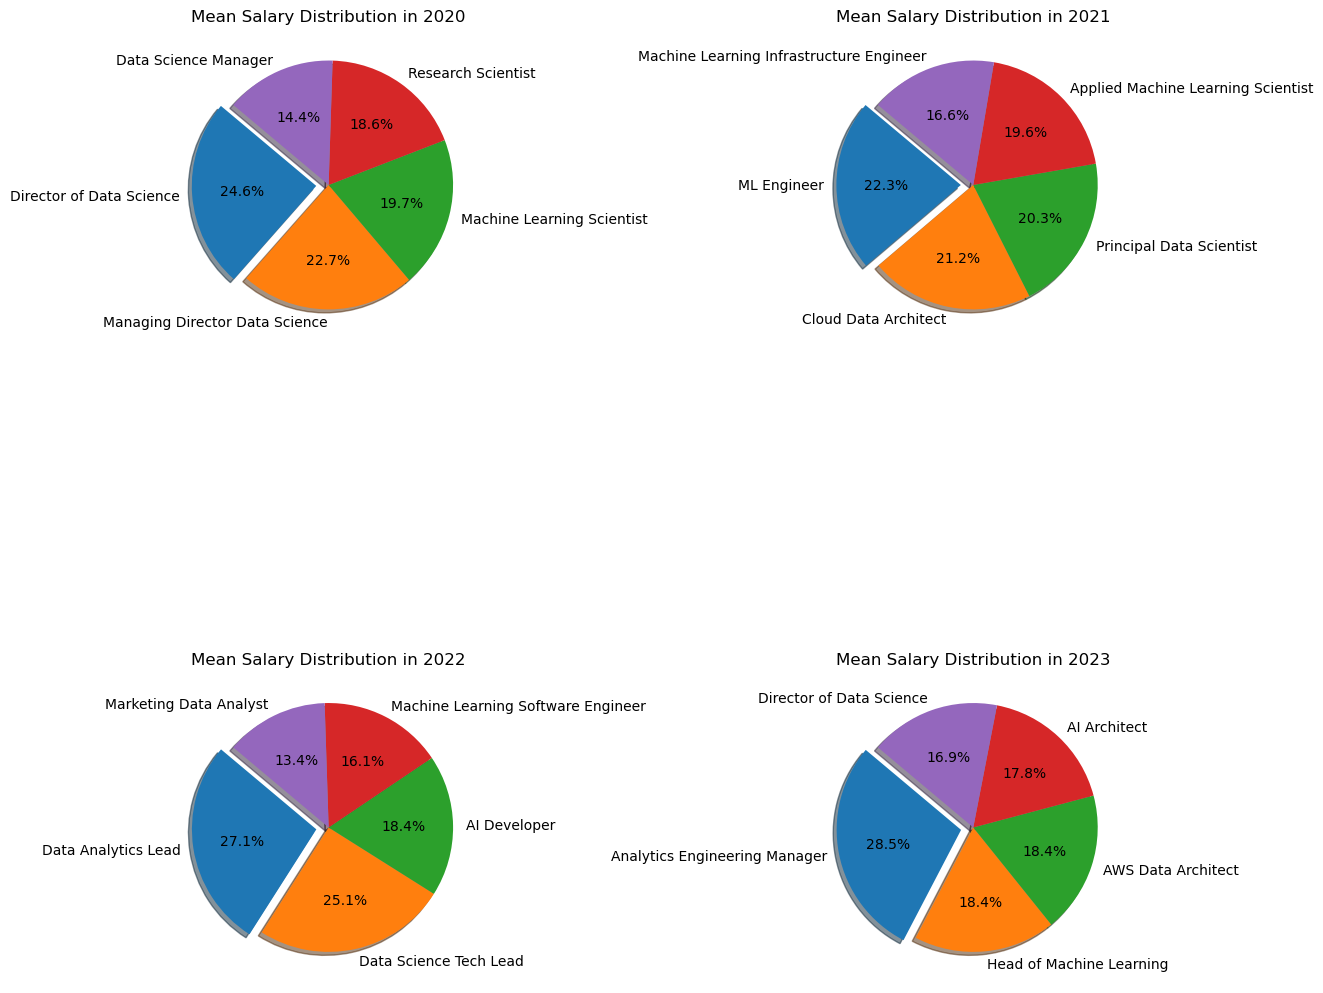

In [24]:
# Extract the top 5 job titles for each year
top_5_2020 = mean_salary_2020.nlargest(5, 'salary_in_usd')
top_5_2021 = mean_salary_2021.nlargest(5, 'salary_in_usd')
top_5_2022 = mean_salary_2022.nlargest(5, 'salary_in_usd')
top_5_2023 = mean_salary_2023.nlargest(5, 'salary_in_usd')
# Define the explode parameter to highlight the largest slice
explode = (0.1, 0, 0, 0, 0)
# Plot a pie chart for each year with shadow and explode
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
axs[0, 0].pie(top_5_2020["salary_in_usd"], labels=top_5_2020["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[0, 0].set_title('Mean Salary Distribution in 2020')
axs[0, 1].pie(top_5_2021["salary_in_usd"], labels=top_5_2021["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[0, 1].set_title('Mean Salary Distribution in 2021')
axs[1, 0].pie(top_5_2022["salary_in_usd"], labels=top_5_2022["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[1, 0].set_title('Mean Salary Distribution in 2022')
axs[1, 1].pie(top_5_2023["salary_in_usd"], labels=top_5_2023["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[1, 1].set_title('Mean Salary Distribution in 2023')
plt.tight_layout()
plt.show()

## Job Title count by year

In [25]:
job_title_count_per_year = df.groupby(["work_year", "job_title"])["job_category"].count().reset_index().sort_values(by=["work_year", "job_category"], ascending=False)
job_title_count_per_year

,work_year,job_title,job_category
175,2023,Data Engineer,1662
199,2023,Data Scientist,1538
168,2023,Data Analyst,1091
223,2023,Machine Learning Engineer,864
146,2023,Applied Scientist,254
241,2023,Research Scientist,242
141,2023,Analytics Engineer,200
172,2023,Data Architect,164
159,2023,Business Intelligence Engineer,144
240,2023,Research Engineer,137


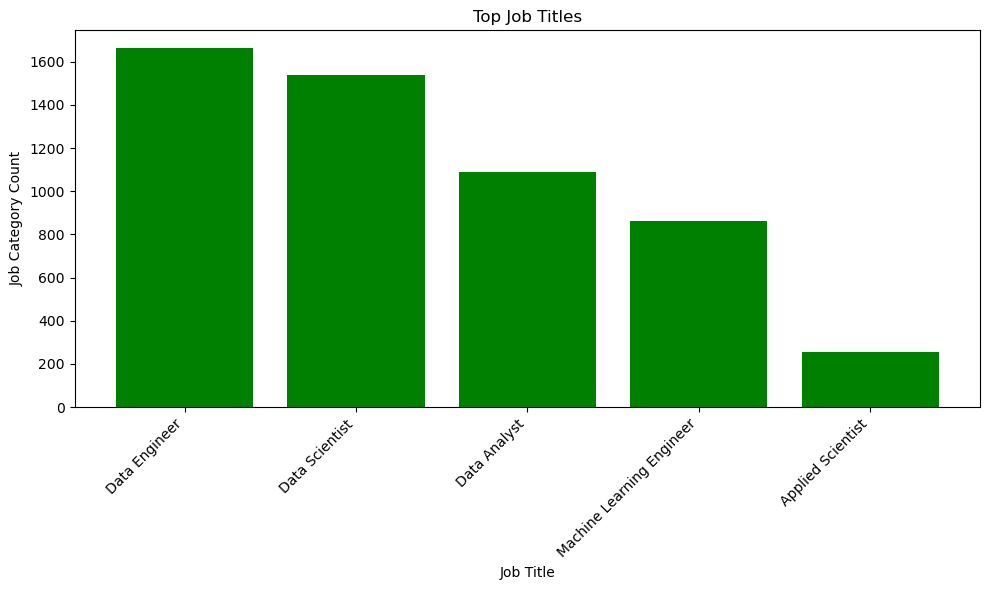

In [26]:
# Group the DataFrame by "work_year" and "job_title" and count the occurrences of each group
grouped_data = df.groupby(["work_year", "job_title"])["job_category"].count().reset_index()
# Sort the grouped data by "work_year" and "job_category" in descending order
sorted_data = grouped_data.sort_values(by=["work_year", "job_category"], ascending=False)
# Get the top records
top_records = sorted_data.head()
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_records["job_title"], top_records["job_category"], color='green')
plt.xlabel('Job Title')
plt.ylabel('Job Category Count')
plt.title('Top Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
top_5_jobs = df.groupby(["work_year", "job_title"])["job_category"].count().reset_index().groupby("work_year").apply(lambda x: x.nlargest(5, "job_category")).reset_index(drop=True)
top_5_jobs

,work_year,job_title,job_category
0,2020,Data Scientist,19
1,2020,Data Engineer,11
2,2020,Data Analyst,6
3,2020,Machine Learning Engineer,4
4,2020,Big Data Engineer,3
5,2021,Data Engineer,35
6,2021,Data Scientist,34
7,2021,Data Analyst,19
8,2021,Machine Learning Engineer,16
9,2021,Research Scientist,10


In [28]:
top_5_jobs_2023 = top_5_jobs[top_5_jobs["work_year"] == 2023].head(5)
top_5_jobs_2022 = top_5_jobs[top_5_jobs["work_year"] == 2022].head(5)
top_5_jobs_2021 = top_5_jobs[top_5_jobs["work_year"] == 2021].head(5)
top_5_jobs_2020 = top_5_jobs[top_5_jobs["work_year"] == 2020].head(5)

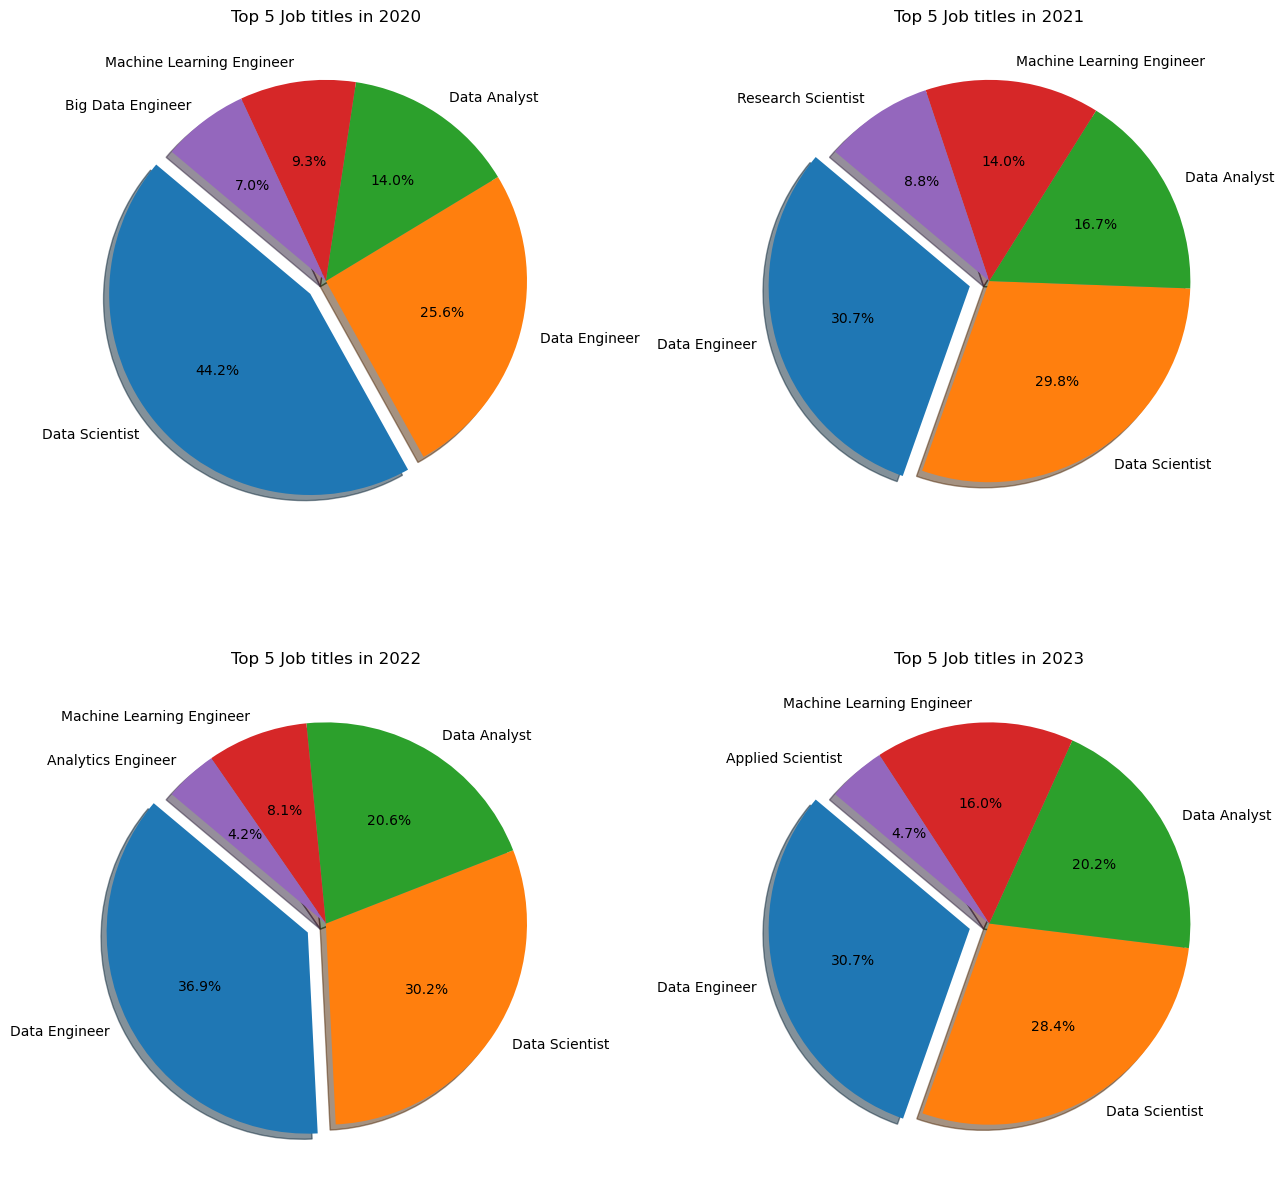

In [29]:
# Extract the top 5 job titles for each year
top_5_2020 = top_5_jobs_2020.nlargest(5, 'job_category')
top_5_2021 = top_5_jobs_2021.nlargest(5, 'job_category')
top_5_2022 = top_5_jobs_2022.nlargest(5, 'job_category')
top_5_2023 = top_5_jobs_2023.nlargest(5, 'job_category')
# Define the explode parameter to highlight the largest slice
explode = (0.1, 0, 0, 0, 0)
# Plot a pie chart for each year with shadow and explode
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
axs[0, 0].pie(top_5_2020["job_category"], labels=top_5_2020["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[0, 0].set_title('Top 5 Job titles in 2020')
axs[0, 1].pie(top_5_2021["job_category"], labels=top_5_2021["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[0, 1].set_title('Top 5 Job titles in 2021')
axs[1, 0].pie(top_5_2022["job_category"], labels=top_5_2022["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[1, 0].set_title('Top 5 Job titles in 2022')
axs[1, 1].pie(top_5_2023["job_category"], labels=top_5_2023["job_title"], autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
axs[1, 1].set_title('Top 5 Job titles in 2023')
plt.tight_layout()
plt.show()


## Experience Level Analysis

In [30]:
experience_level = df.groupby(["job_title","experience_level"])["job_category"].count().reset_index().sort_values(by=[ "job_category"], ascending=False)
experience_level

,job_title,experience_level,job_category
156,Data Scientist,Senior,1540
106,Data Engineer,Senior,1534
84,Data Analyst,Senior,892
211,Machine Learning Engineer,Senior,833
105,Data Engineer,Mid-level,468
83,Data Analyst,Mid-level,363
155,Data Scientist,Mid-level,327
32,Applied Scientist,Senior,234
20,Analytics Engineer,Senior,201
98,Data Architect,Senior,190


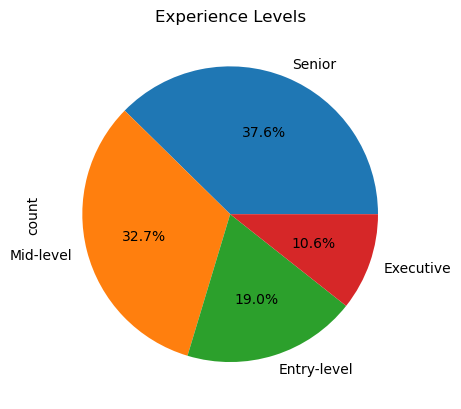

In [31]:
#pie chart for experience level 
experience_data = experience_level["experience_level"].value_counts()

experience_data.plot.pie(autopct="%1.1f%%")
plt.title("Experience Levels")
plt.show()

In [32]:
# Create a summary table
summary_table = df.groupby(['company_size', 'job_title', 'experience_level']).size().reset_index(name='frequency')
# Pivot the table using the pivot_table function
pivot_table = summary_table.pivot_table(index='job_title', columns='experience_level', values='frequency', aggfunc='sum', fill_value=0)
# Sort by total frequencies to identify the top 10 company_locations
total_frequencies = pivot_table.sum(axis=1)
top_10_job_title_indices = total_frequencies.nlargest(10).index
# Use the top 10 company_locations to filter the pivot table
top_10_job_titles = pivot_table.loc[top_10_job_title_indices]
# Display the top 10 locations pivot table
top_10_job_titles

experience_level,Entry-level,Executive,Mid-level,Senior
job_title,,,,
Data Engineer,88,105,468,1534
Data Scientist,92,30,327,1540
Data Analyst,119,14,363,892
Machine Learning Engineer,21,6,131,833
Applied Scientist,8,0,30,234
Research Scientist,23,3,58,185
Analytics Engineer,6,12,37,201
Data Architect,0,2,21,190
Business Intelligence Engineer,0,4,12,128


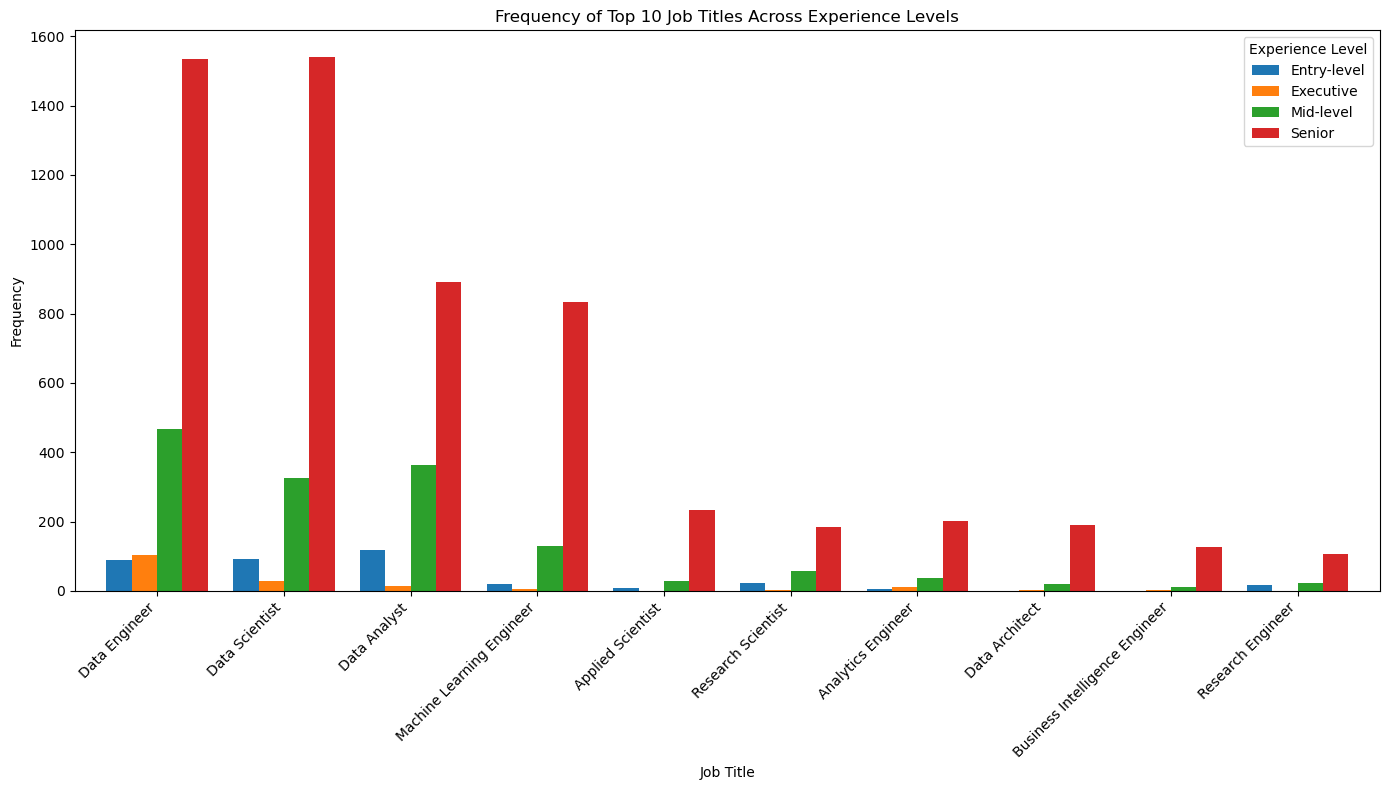

In [33]:
top_10_job_titles.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Frequency of Top 10 Job Titles Across Experience Levels')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

In [158]:
#.  QUESTION: How can I analyze the average salaries for entry-level positions within specific job 
#.            categories across different years and company locations, and then display these average salaries?

experience_level = 'Entry-level'
df_filtered = df_filtered_by_year[df_filtered_by_year['experience_level'] == experience_level]

# Group the data by ‘work_year’, ‘company_location’, and ‘job_category’ and count the occurrences
job_category_counts = df_filtered.groupby(['work_year', 'company_location', 'job_category'])['salary_in_usd'].mean().round().reset_index(name='average_salary')
job_category_counts

,work_year,company_location,job_category,average_salary
0,2020,Canada,Data Analysis,44753.0
1,2020,Denmark,Machine Learning and AI,45896.0
2,2020,France,Data Science and Research,45618.0
3,2020,Germany,Data Analysis,47899.0
4,2020,Germany,Data Engineering,54742.0
5,2020,Germany,Data Science and Research,55997.0
6,2020,Germany,Machine Learning and AI,15966.0
7,2020,Italy,Data Science and Research,21669.0
8,2020,Mauritius,Data Engineering,100000.0
9,2020,Netherlands,Data Science and Research,42000.0


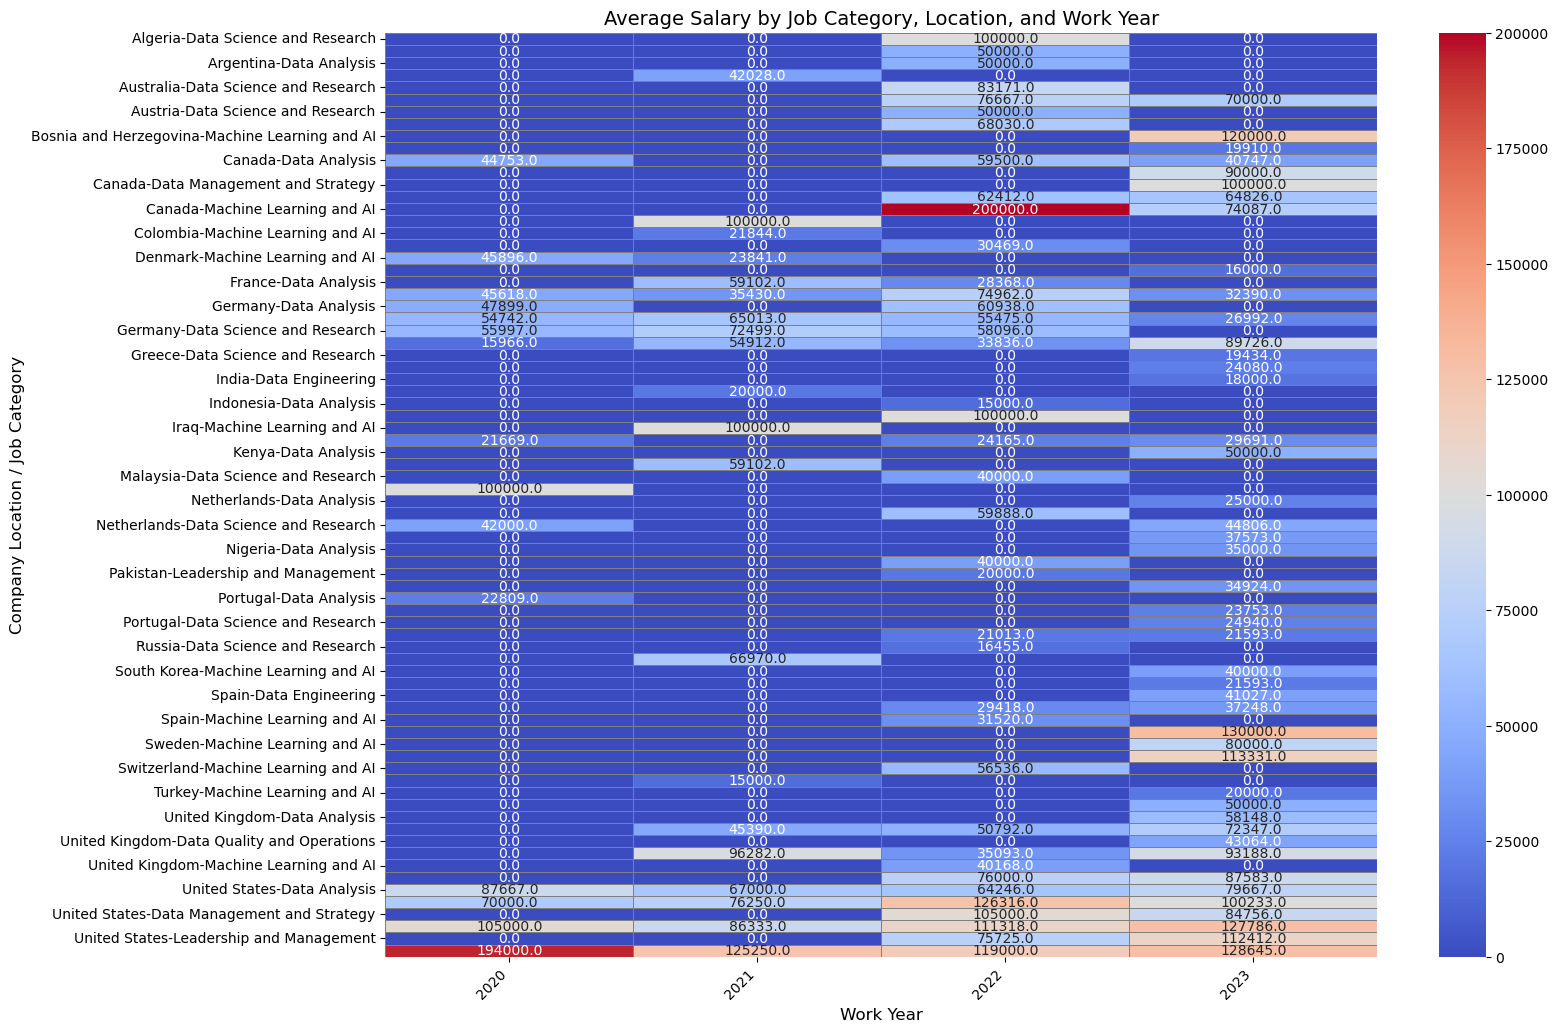

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the job_category_counts DataFrame to prepare it for the heatmap
pivot_table = job_category_counts.pivot_table(index=['company_location', 'job_category'], 
                                              columns='work_year', 
                                              values='average_salary', 
                                              fill_value=0)
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={"size": 10}, linewidths=0.5, linecolor='gray')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Company Location / Job Category', fontsize=12)
plt.title('Average Salary by Job Category, Location, and Work Year', fontsize=14)
plt.show()



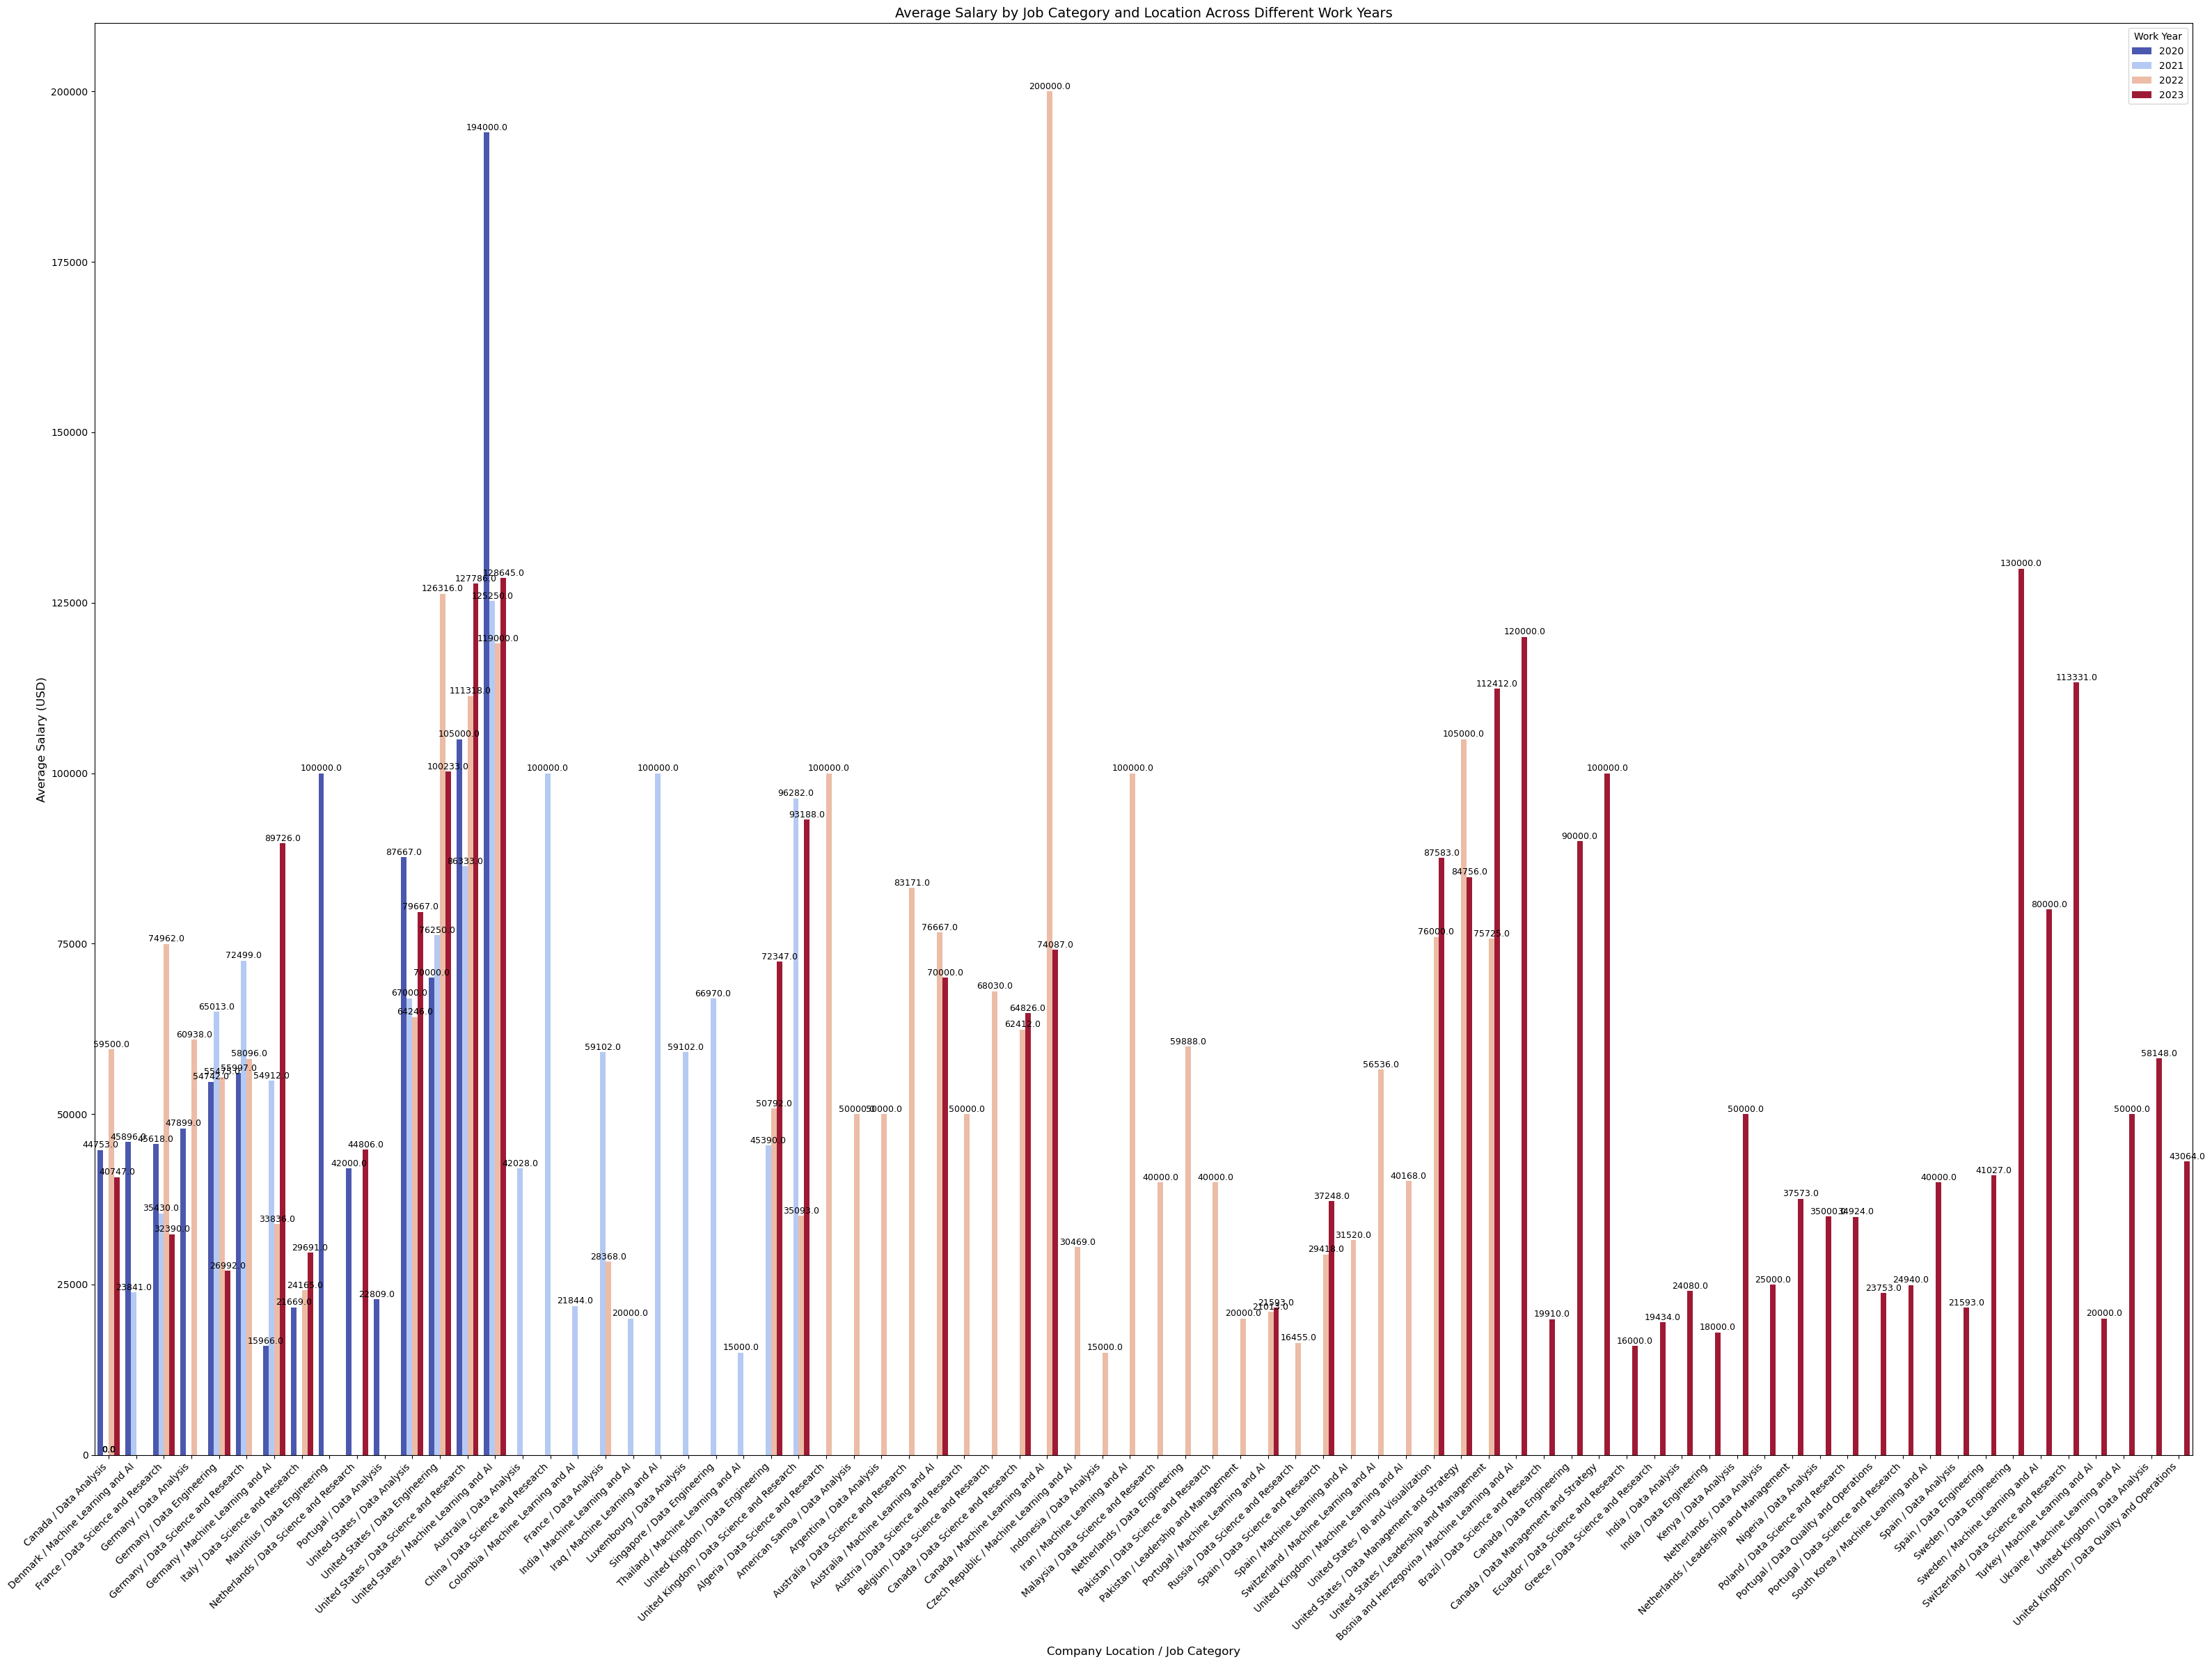

In [94]:
#Create the bar plot ?


job_category_counts['location_category'] = job_category_counts['company_location'] + ' / ' + job_category_counts['job_category']

# Create the bar plot
plt.figure(figsize=(32, 24))
barplot = sns.barplot(data=job_category_counts, x='location_category', y='average_salary', hue='work_year', palette='coolwarm')

plt.title('Average Salary by Job Category and Location Across Different Work Years', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.xlabel('Company Location / Job Category', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.legend(title='Work Year', fontsize=10)

# Optional: Add value labels on top of each bar for clarity
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=9, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

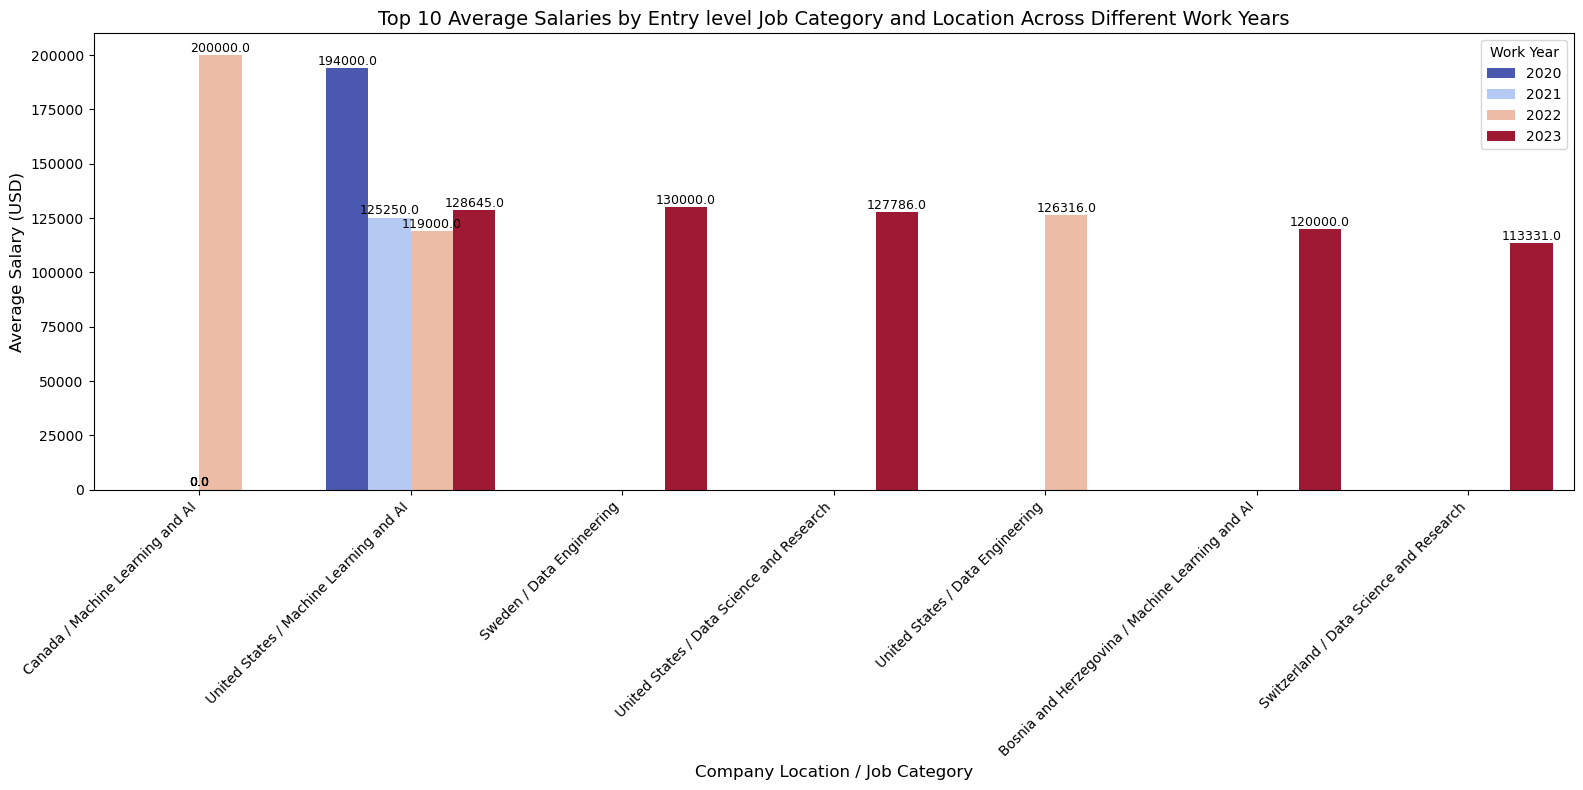

In [95]:
# for better visulation and comparison  can you get top 10 job categories? 


import seaborn as sns
import matplotlib.pyplot as plt


# Sort by 'average_salary' and select the top 10 categories
top_10_categories = job_category_counts.sort_values(by='average_salary', ascending=False).head(10)

# Create the bar plot for the top 10 categories
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
barplot = sns.barplot(data=top_10_categories, x='location_category', y='average_salary', hue='work_year', palette='coolwarm')

plt.title('Top 10 Average Salaries by Entry level Job Category and Location Across Different Work Years', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.xlabel('Company Location / Job Category', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.legend(title='Work Year', fontsize=10)

# Optional: Add value labels on top of each bar for clarity
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate('{:.1f}'.format(height), 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     fontsize=9, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [99]:
#   CONCULUSION: for Entry_level, new graduate people; 
#   High-Paying Regions: Aim for jobs in regions known for higher entry-level salaries, such as the US, Canada, 
#.  Sweden', 'Switzerland', and 'Bosnia'.
#   Skill Development: Focus on acquiring skills in high-demand areas like Data Science, Data Engineering, 
#.  and AI.
#   Emerging Markets: Don't ignore opportunities in emerging markets, which can offer competitive salaries 
#.  with potentially less competition.


In [ ]:
#    QUESTION: What are the top-paying entry-level job titles in the field (job categories) of Machine Learning, AI, 
#              and Data Science in the World, and what strategies should job seekers adopt to 
#.             secure these positions?

In [136]:
# Define the job categories and company locations of interest
job_categories_of_interest = ['Data Science and Research', 'Machine Learning and AI', 'Data Engineering']
company_locations_of_interest = ['Canada', 'United States', 'Sweden', 'Switzerland', 'Bosnia']

# Step 1: Filter the DataFrame
filtered_df = df[
    (df['experience_level'] == 'Entry-level') & 
    df['job_category'].isin(job_categories_of_interest) & 
    df['company_location'].isin(company_locations_of_interest)
]

# Step 2 and 3: Group by 'job_title' and 'company_location', then calculate the mean average salary
average_salary_by_title_and_location = filtered_df.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index()
average_salary_by_title_and_location

,job_title,company_location,salary_in_usd
0,AI Developer,Sweden,80000.000000
1,AI Developer,United States,130000.000000
2,AI Programmer,Canada,74087.000000
3,AI Scientist,Canada,200000.000000
4,AI Scientist,United States,50000.000000
5,Applied Scientist,United States,178367.500000
6,BI Data Engineer,United States,60000.000000
7,Big Data Engineer,Sweden,130000.000000
8,Big Data Engineer,United States,70000.000000
9,Cloud Data Engineer,United States,100000.000000


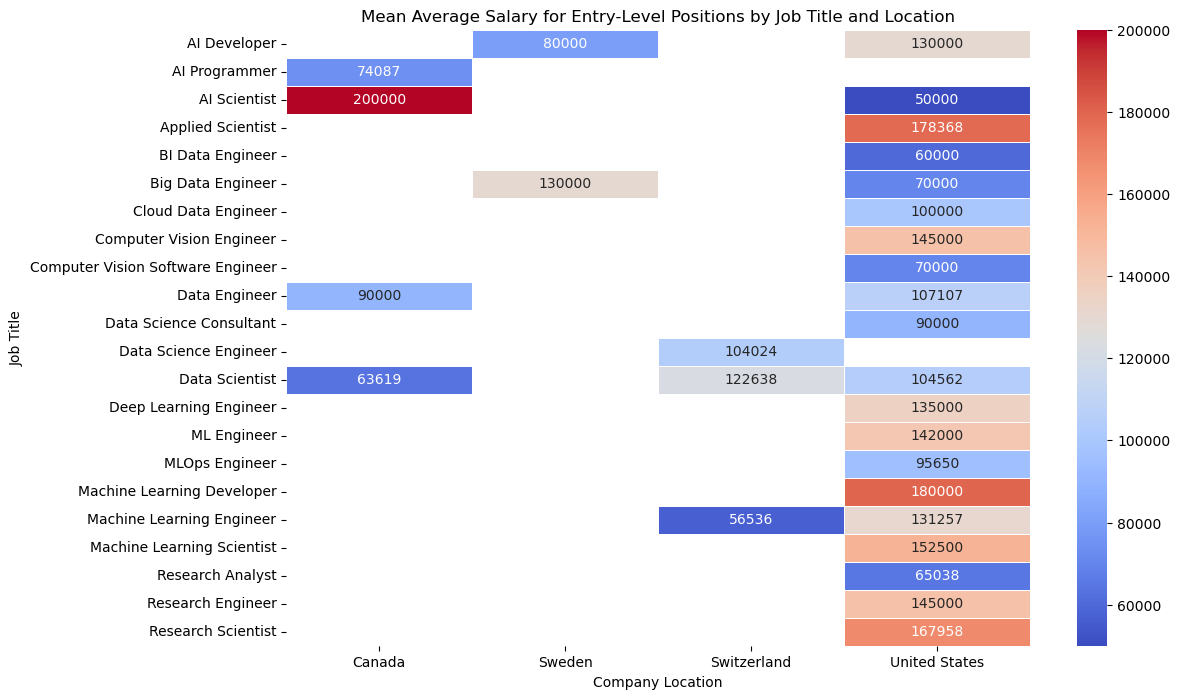

In [137]:
# Corrected pivot call with keyword arguments
pivoted_data = average_salary_by_title_and_location.pivot(index="job_title", columns="company_location", values="salary_in_usd")

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Mean Average Salary for Entry-Level Positions by Job Title and Location')
plt.xlabel('Company Location')
plt.ylabel('Job Title')

plt.show()


In [ ]:
#    QUESTION: What are the top-paying entry-level job titles in the fields of Machine Learning, AI, 
#              and Data Science in the United States, and what strategies should job seekers adopt to 
#.             secure these positions?

In [153]:
# Filter the DataFrame for entry-level positions in the specified job categories and only in the United States
filtered_df = df[
    (df['experience_level'] == 'Entry-level') & 
    df['job_category'].isin(['Data Science and Research', 'Machine Learning and AI', 'Data Engineering']) & 
    (df['company_location'] == 'United States')
]

# Group by both 'job_category' and 'job_title', then calculate the mean average salary
average_salary_by_category_and_title = filtered_df.groupby(['job_category', 'job_title'])['salary_in_usd'].mean().reset_index()

# Sort the results by average salary in descending order
sorted_salaries = average_salary_by_category_and_title.sort_values(by='salary_in_usd', ascending=False)
sorted_salaries.head()

,job_category,job_title,salary_in_usd
17,Machine Learning and AI,Machine Learning Developer,180000.0
4,Data Science and Research,Applied Scientist,178367.5
9,Data Science and Research,Research Scientist,167958.0
19,Machine Learning and AI,Machine Learning Scientist,152500.0
12,Machine Learning and AI,Computer Vision Engineer,145000.0


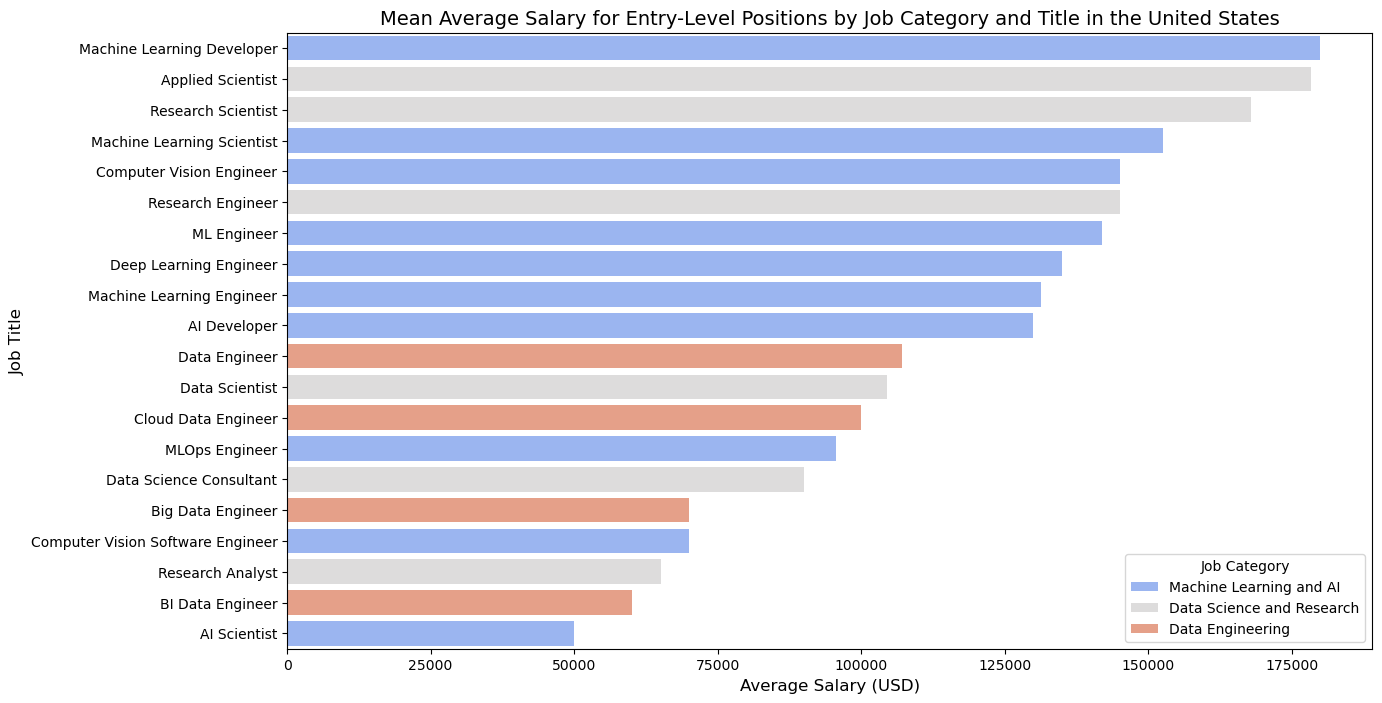

                 job_category                   job_title  salary_in_usd
17    Machine Learning and AI  Machine Learning Developer       180000.0
4   Data Science and Research           Applied Scientist       178367.5
9   Data Science and Research          Research Scientist       167958.0
19    Machine Learning and AI  Machine Learning Scientist       152500.0
12    Machine Learning and AI    Computer Vision Engineer       145000.0


In [157]:
# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(data=sorted_salaries, x='salary_in_usd', y='job_title', hue='job_category', palette="coolwarm")

plt.title('Mean Average Salary for Entry-Level Positions by Job Category and Title in the United States', fontsize=14)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.legend(title='Job Category')

plt.show()

# Display the first few rows of the sorted DataFrame (optional)
print(sorted_salaries.head())


In [ ]:
# 

In [ ]:
#.Conculusion;  The data reveals that entry-level roles in 'Machine Learning and AI' and 'Data Science and 
#            Research in the United States offer substantial salaries, highlighting the high demand and value of 
#            skills in these fields. Positions like "Machine Learning Developer" and "Applied Scientist" lead 
#.           with salariesup to $180,000, indicating lucrative opportunities for newcomers  with 
#.           expertise in these areas. To capitalize on these opportunities, job seekers should focus on 
#.           building specialized skills in machine learning, AI, and data science, supported by continuous 
#            learning and networking.
                
